In [29]:
import xarray as xr
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.data import load_tc_data
from utils.plot import make_cmap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# load data
real,inputs,pred,meta = load_tc_data(set='validation',results='ke_tracks')
real_2,inputs_2,pred_2,meta_2,inputs_og,pred_og,meta_og = load_tc_data(set='validation',results='kh_tracks')
meta_og = pd.read_csv('/user/work/al18709/tc_data_mswep_40/valid_meta.csv')
meta_valid = pd.read_csv('/user/work/al18709/tc_data_flipped/valid_meta.csv')
elevation = np.load('/user/work/al18709/tc_data_t/valid_y.npy')


In [3]:
print(inputs_2.shape)
precip_cmap,precip_norm = make_cmap(low_vals=True)

(15930, 10, 10, 7)


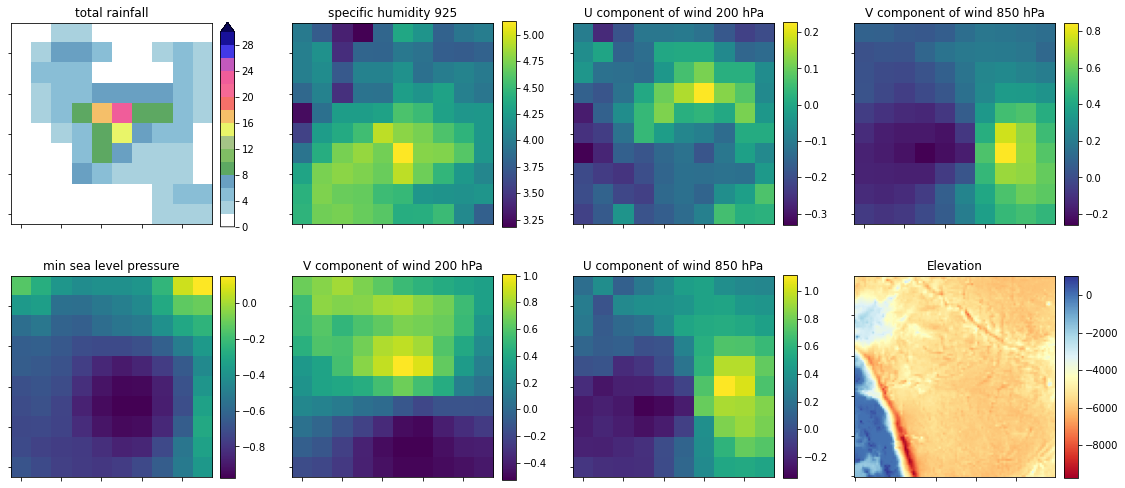

In [138]:
i = 100 # good pattern on ERA5 data but no elevation
# ['mslp','q-925','u-200','u-850','v-200','v-850']
fig, axes = plt.subplots(2, 12, figsize=(20, 9), sharey=False,gridspec_kw={'width_ratios': [1, 0.07, 0.2, 1, 0.07, 0.2, 1, 0.07, 0.2, 1, 0.07, 0.2]})

rain = axes[0,0].imshow(inputs_2[i,:,:,0],origin='lower',cmap=precip_cmap,norm=precip_norm)
axes[0,0].set_title('total rainfall')
axes[0,0].set(xticklabels=[],yticklabels=[])
fig.colorbar(rain, cax=axes[0,1])
axes[0,1].set(aspect = 14.75,anchor=(0,0.5))
axes[0,2].remove()

im = axes[1,0].imshow(inputs_2[i,:,:,1],origin='lower')
axes[1,0].set_title('min sea level pressure')
axes[1,0].set(xticklabels=[],yticklabels=[])
fig.colorbar(im, cax=axes[1,1])
axes[1,1].set(aspect = 12.75,anchor=(0,0.5))
axes[1,2].remove()

im = axes[0,3].imshow(inputs_2[i,:,:,2],origin='lower')
axes[0,3].set_title('specific humidity 925')
axes[0,3].set(xticklabels=[],yticklabels=[])
fig.colorbar(im,cax=axes[0,4])
axes[0,4].set(aspect = 7.5,anchor=(0,0.5))
axes[0,5].remove()

im = axes[0,6].imshow(inputs_2[i,:,:,3],origin='lower')
axes[0,6].set_title( 'U component of wind 200 hPa')
axes[0,6].set(xticklabels=[],yticklabels=[])
fig.colorbar(im,cax=axes[0,7])
axes[0,7].set(aspect = 25.75,anchor=(0,0.5))
axes[0,8].remove()

im = axes[1,3].imshow(inputs_2[i,:,:,4],origin='lower')
axes[1,3].set_title('V component of wind 200 hPa' )
axes[1,3].set(xticklabels=[],yticklabels=[])
fig.colorbar(im,cax=axes[1,4])
axes[1,4].set(aspect = 9.5,anchor=(0,0.5))
axes[1,5].remove()

im = axes[1,6].imshow(inputs_2[i,:,:,5],origin='lower')
axes[1,6].set_title('U component of wind 850 hPa')
axes[1,6].set(xticklabels=[],yticklabels=[])
fig.colorbar(im,cax=axes[1,7])
axes[1,7].set(aspect = 9.8,anchor=(0,0.5))
axes[1,8].remove()

im = axes[0,9].imshow(inputs_2[i,:,:,6],origin='lower')
axes[0,9].set_title('V component of wind 850 hPa')
axes[0,9].set(xticklabels=[],yticklabels=[])
fig.colorbar(im,cax=axes[0,10])
axes[0,10].set(aspect = 13,anchor=(0,0.5))
axes[0,11].remove()

im = axes[1,9].imshow(elevation[i,:,:],origin='lower',cmap = 'RdYlBu')
axes[1,9].set_title('Elevation')
axes[1,9].set(xticklabels=[],yticklabels=[])
fig.colorbar(im,cax=axes[1,10])
axes[1,10].set(aspect = 0.00133)
axes[1,11].remove()

plt.subplots_adjust(wspace=0.1, hspace=0.07)
# plt.tight_layout()
plt.savefig('2d_input_variables5.png',facecolor='white',transparent=False,bbox_inches='tight')